In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\3.concertriccir2.csv", header=None)

In [4]:
data.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [5]:
data.shape
data.info()

(500, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [6]:
data.duplicated().value_counts()

False    500
dtype: int64

In [7]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

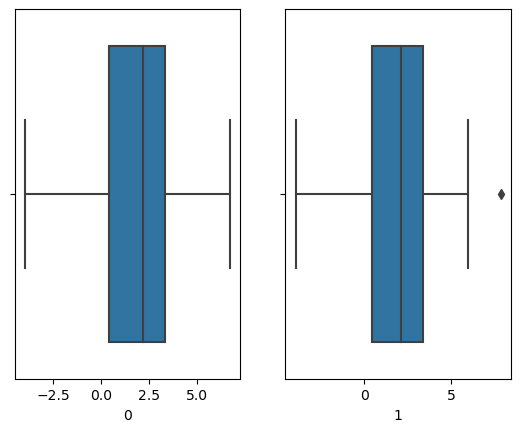

In [8]:
plt.subplot(121)
sns.boxplot(x=data[0])
plt.subplot(122)
sns.boxplot(x=data[1]);

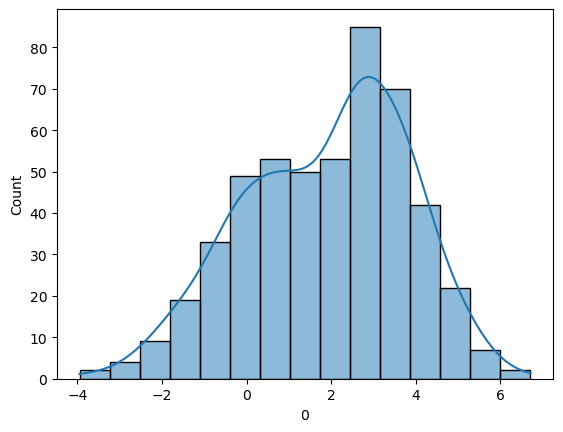

In [9]:
sns.histplot(data[0], kde=True);

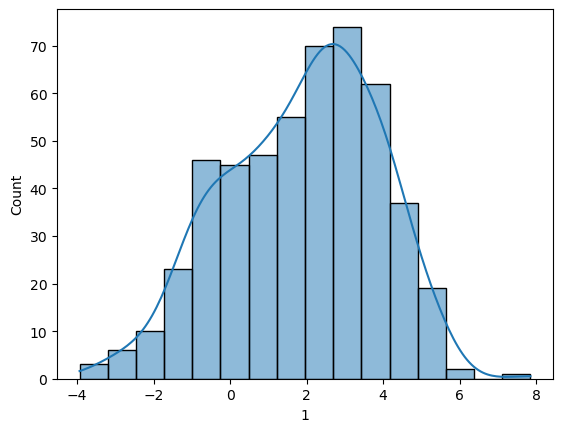

In [10]:
sns.histplot(data[1],kde=True);

In [11]:
data[2].value_counts()

0.0    250
1.0    250
Name: 2, dtype: int64

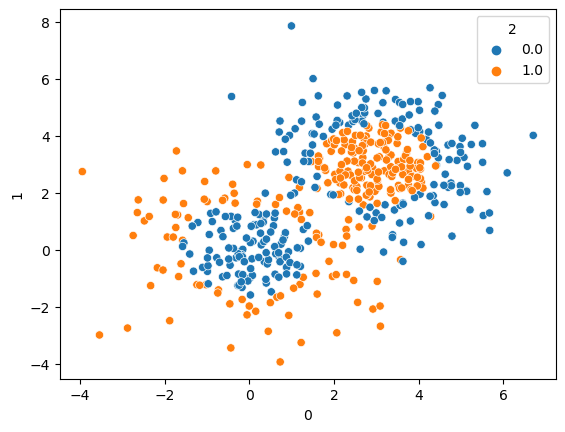

In [12]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[0,1]],data[2],test_size=0.1)

### Rescaling the features

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [15]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Buliding the model using sigmoid

In [16]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim = 2))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.get_weights()

[array([[-2.1200013e-01,  5.1407075e-01, -6.2577939e-01, -8.1430531e-01],
        [ 2.1708775e-01,  5.7271481e-02, -3.3521652e-04,  8.6081696e-01]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.8384742 , -0.2937215 , -0.47838166],
        [ 0.29925   , -0.7147032 , -0.9083564 ],
        [-0.36138296, -0.66612256,  0.27421737],
        [-0.47419238,  0.40180004,  0.5367193 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.29236293,  0.8808266 ],
        [ 0.36576045,  0.43326283],
        [ 0.98272824, -0.84273875]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8372394 ],
        [-0.39282584]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 1s 7ms/step - loss: 0.7786 - accuracy: 0.4611 - val_loss: 0.6578 - val_accuracy: 0.6333
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.7555 - accuracy: 0.4611 - val_loss: 0.6573 - val_accuracy: 0.6333
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.7384 - accuracy: 0.4611 - val_loss: 0.6591 - val_accuracy: 0.6333
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.7257 - accuracy: 0.4611 - val_loss: 0.6625 - val_accuracy: 0.6333
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.4611 - val_loss: 0.6665 - val_accuracy: 0.6333
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.4611 - val_loss: 0.6710 - val_accuracy: 0.6333
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.4611 - val_loss: 0.6755 - val_accuracy: 0.6333
Epoch 8/50
36/36 [==

In [21]:
#SGD
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 3ms/step


array([[0.5388794 ],
       [0.5391955 ],
       [0.5388026 ],
       [0.53918827],
       [0.5391055 ],
       [0.5375946 ],
       [0.53784436],
       [0.5384837 ],
       [0.5391109 ],
       [0.53921825],
       [0.5390253 ],
       [0.53882027],
       [0.53898436],
       [0.53817266],
       [0.53938586],
       [0.53821015],
       [0.538758  ],
       [0.5392216 ],
       [0.5389127 ],
       [0.5382374 ],
       [0.5379479 ],
       [0.5391814 ],
       [0.5383576 ],
       [0.5376785 ],
       [0.53825015],
       [0.53928006],
       [0.5392211 ],
       [0.53842574],
       [0.5392046 ],
       [0.5391607 ],
       [0.538873  ],
       [0.5381959 ],
       [0.5378668 ],
       [0.5381702 ],
       [0.5383502 ],
       [0.5397297 ],
       [0.53888756],
       [0.5377202 ],
       [0.5389403 ],
       [0.53849614],
       [0.53878075],
       [0.53812295],
       [0.53835934],
       [0.5388109 ],
       [0.53904134],
       [0.5387444 ],
       [0.5388087 ],
       [0.538

In [22]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.46

In [24]:
val_loss = history.history['val_loss']
loss = history.history['loss']

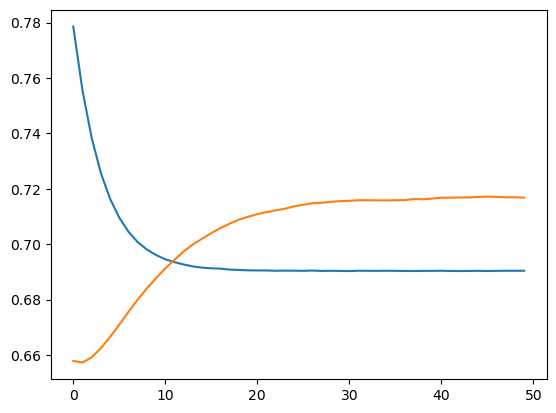

In [25]:
plt.plot(loss)
plt.plot(val_loss)

In [26]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 7s 777us/step


<AxesSubplot: >

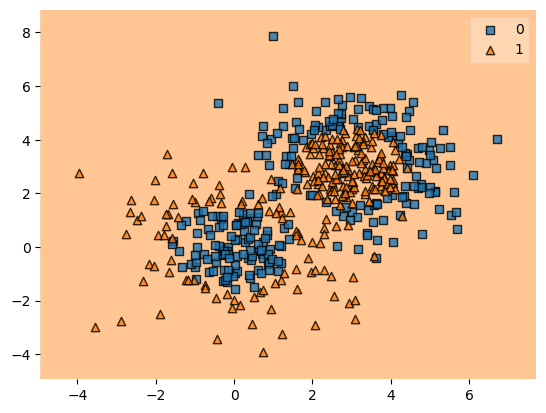

In [27]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 884us/step


<AxesSubplot: >

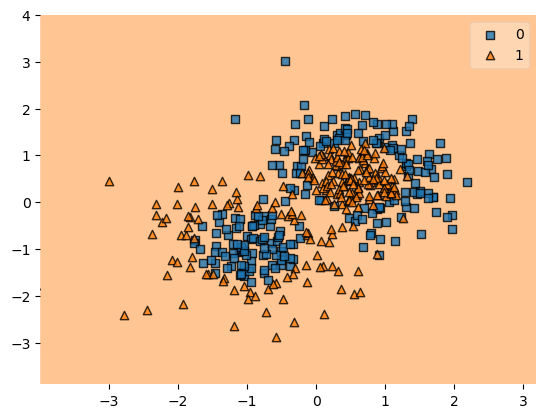

In [28]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 9s 906us/step


<AxesSubplot: >

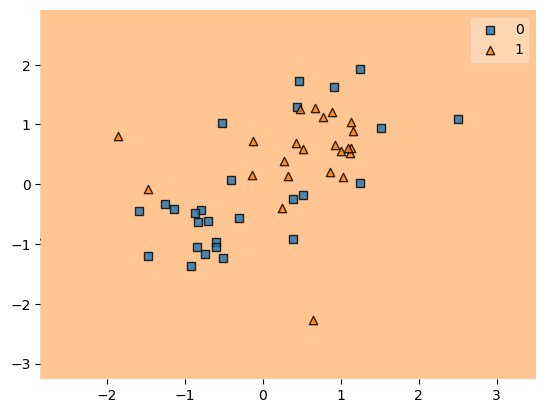

In [29]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the tanh activation func

In [30]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [31]:
model.get_weights()

[array([[-0.9966977 ,  0.48384917, -1.0386701 ],
        [-0.10266614,  0.640743  ,  0.7328545 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.9527117 ,  0.51430166],
        [-0.07981098,  0.8364215 ],
        [-0.26879787,  0.2395432 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.1786119],
        [1.0078195]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 1s 6ms/step - loss: 3.7573 - accuracy: 0.5222 - val_loss: 2.3859 - val_accuracy: 0.5556
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 3.6791 - accuracy: 0.5250 - val_loss: 2.3809 - val_accuracy: 0.5333
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 3.5357 - accuracy: 0.5389 - val_loss: 2.3802 - val_accuracy: 0.5778
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 3.3841 - accuracy: 0.5417 - val_loss: 2.3796 - val_accuracy: 0.5889
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 3.3640 - accuracy: 0.5417 - val_loss: 2.3764 - val_accuracy: 0.5889
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 3.3589 - accuracy: 0.5417 - val_loss: 2.3720 - val_accuracy: 0.5889
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 3.2949 - accuracy: 0.5417 - val_loss: 2.3684 - val_accuracy: 0.5889
Epoch 8/50
36/36 [==

In [35]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 3ms/step


array([[0.4861609 ],
       [0.6703863 ],
       [0.63620204],
       [0.6058975 ],
       [0.6168139 ],
       [0.17096293],
       [0.21780021],
       [0.5065223 ],
       [0.6535832 ],
       [0.6632251 ],
       [0.67102456],
       [0.64091474],
       [0.66834825],
       [0.3420984 ],
       [0.6608909 ],
       [0.36116287],
       [0.61881393],
       [0.640505  ],
       [0.6599773 ],
       [0.3377765 ],
       [0.2409307 ],
       [0.6805441 ],
       [0.44395435],
       [0.16676807],
       [0.38117248],
       [0.59672964],
       [0.6465013 ],
       [0.43458712],
       [0.6474326 ],
       [0.6444985 ],
       [0.57039094],
       [0.357767  ],
       [0.21409258],
       [0.3402422 ],
       [0.41965628],
       [0.6622363 ],
       [0.6450665 ],
       [0.18084256],
       [0.57760656],
       [0.49001595],
       [0.6288402 ],
       [0.31674093],
       [0.42100355],
       [0.6083562 ],
       [0.6732555 ],
       [0.38404343],
       [0.55164295],
       [0.535

In [36]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.76

In [38]:
val_loss = history.history['val_loss']
loss = history.history['loss']

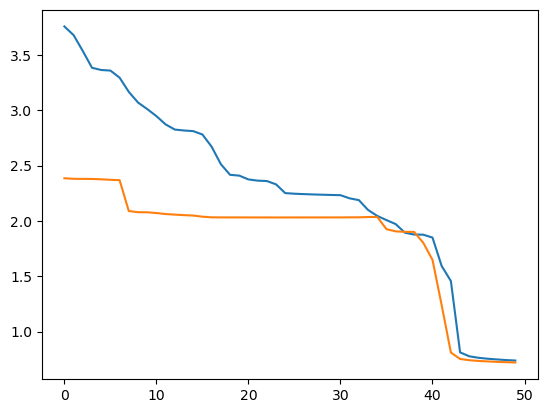

In [39]:
plt.plot(loss)
plt.plot(val_loss)

In [40]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 8s 820us/step


<AxesSubplot: >

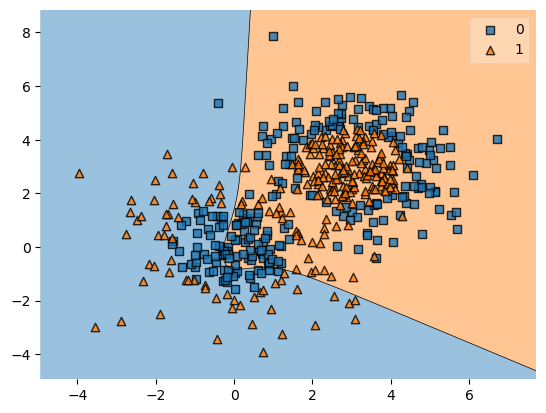

In [41]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 7s 719us/step


<AxesSubplot: >

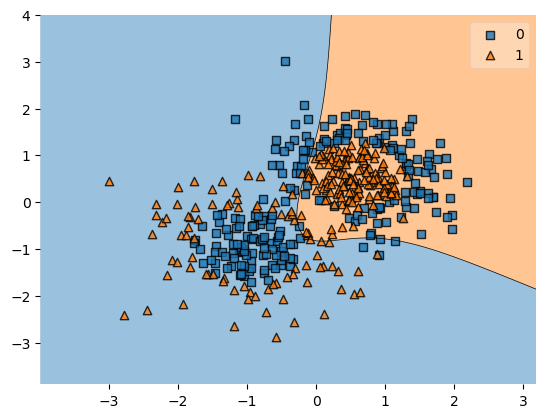

In [42]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 8s 812us/step


<AxesSubplot: >

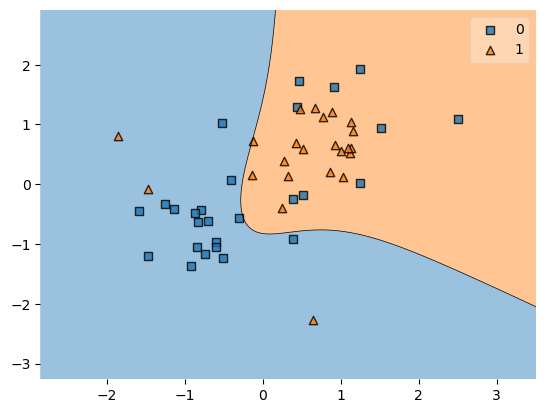

In [43]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the Relu activation func

In [44]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [45]:
model.get_weights()

[array([[-0.507766  ,  0.43251562, -0.19234163,  0.1725825 ,  0.05392122],
        [ 0.7422925 , -0.8071482 , -0.6099591 ,  0.32878518, -0.5998014 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.7778969 ,  0.40564   , -0.46558172,  0.05156577],
        [-0.5584601 , -0.13833767, -0.77215123, -0.33165872],
        [ 0.57502663, -0.41620496, -0.5933458 , -0.20710123],
        [ 0.6807817 , -0.7753119 ,  0.16218704,  0.13750392],
        [-0.35046113, -0.64818573,  0.6951517 ,  0.5792906 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.95874023,  0.64632106],
        [-0.20533371, -0.74031806],
        [-0.58171344,  0.13202572],
        [ 0.327219  ,  0.23525453]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.24845123],
        [ 0.41815472]], dtype=float32),
 array([0.], dtype=float32)]

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 15        
                                                                 
 dense_8 (Dense)             (None, 4)                 24        
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 1s 6ms/step - loss: 0.6970 - accuracy: 0.5361 - val_loss: 0.7125 - val_accuracy: 0.3667
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5389 - val_loss: 0.7127 - val_accuracy: 0.3667
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5389 - val_loss: 0.7109 - val_accuracy: 0.3667
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5389 - val_loss: 0.7097 - val_accuracy: 0.3667
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5389 - val_loss: 0.7084 - val_accuracy: 0.3667
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5389 - val_loss: 0.7070 - val_accuracy: 0.3667
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5389 - val_loss: 0.7061 - val_accuracy: 0.3667
Epoch 8/50
36/36 [==

In [49]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 5ms/step


array([[0.36009902],
       [0.64104396],
       [0.49856317],
       [0.5797116 ],
       [0.7892481 ],
       [0.80458504],
       [0.28086016],
       [0.7306889 ],
       [0.78040487],
       [0.71407783],
       [0.49856317],
       [0.7640942 ],
       [0.57947385],
       [0.29814574],
       [0.7050262 ],
       [0.2966016 ],
       [0.80005074],
       [0.7800874 ],
       [0.49856317],
       [0.5670773 ],
       [0.49672106],
       [0.49856317],
       [0.7378933 ],
       [0.59209144],
       [0.28257474],
       [0.35683244],
       [0.7777781 ],
       [0.35644865],
       [0.7782691 ],
       [0.7817051 ],
       [0.35159215],
       [0.35380706],
       [0.537152  ],
       [0.3664283 ],
       [0.29834896],
       [0.71585894],
       [0.79054844],
       [0.7200608 ],
       [0.43337384],
       [0.24512511],
       [0.49856317],
       [0.33925864],
       [0.31221458],
       [0.8040794 ],
       [0.53668284],
       [0.47747084],
       [0.2513349 ],
       [0.785

In [50]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.8

In [52]:
val_loss = history.history['val_loss']
loss = history.history['loss']

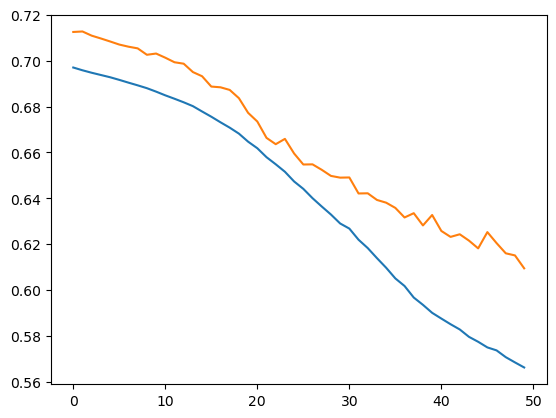

In [53]:
plt.plot(loss)
plt.plot(val_loss)

In [54]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 20s 2ms/step


<AxesSubplot: >

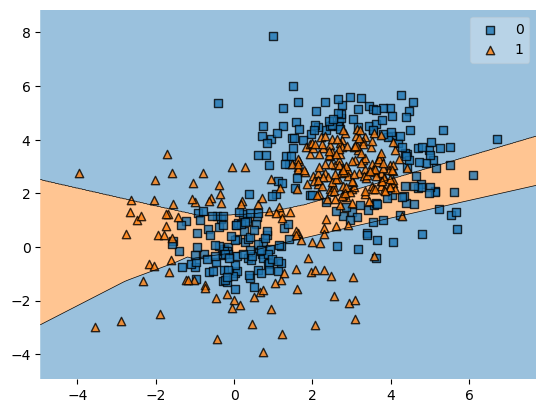

In [55]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 949us/step


<AxesSubplot: >

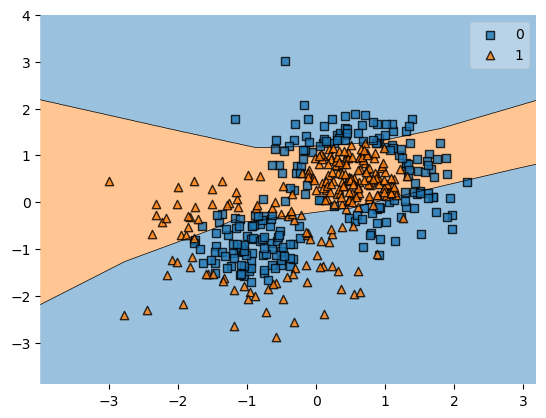

In [56]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 9s 966us/step


<AxesSubplot: >

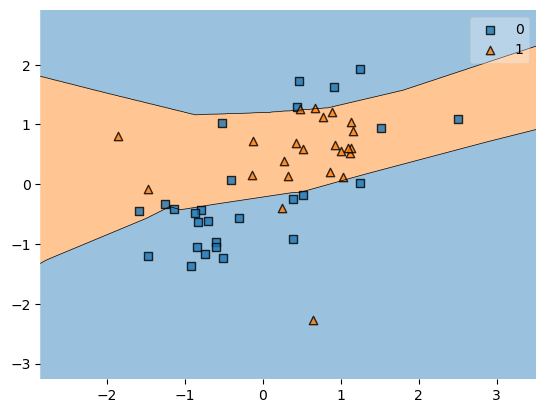

In [57]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)